<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_clipboard()
df.head()

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1


In [3]:
df.shape

(7, 4)

In [4]:
X = df[['x1','x2','x3']].values
y = df.y.values.reshape(-1,1)
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int64)

In [106]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0]], dtype=int64)

In [104]:
import numpy as np
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [105]:
nn = NeuralNetwork()

for i in range(5000):
    if (i in [a for a in range(7)]) or ((i + 1) % 1000 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.78131147]
 [0.81127913]
 [0.80548968]
 [0.77176737]
 [0.76690761]
 [0.82890368]
 [0.73128813]]
Loss: 
 0.2874547544368969
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.70756932]
 [0.73323861]
 [0.7276467 ]
 [0.69929003]
 [0.69445391]
 [0.74860567]
 [0.66689356]]
Loss: 
 0.26213352457721784
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.64135963]
 [0.66017469]
 [0.655369  ]
 [0.63442762]
 [0.62990992]
 [0.67114138]
 [0.61143117]]
Loss: 
 0.24864037059527047
+---------EPOCH 4---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0

In [7]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,0,0


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [89]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [90]:
# input image dimensions
img_rows, img_cols = 28, 28

In [91]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [92]:
x_train[0].shape

(28, 28)

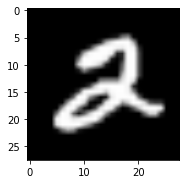

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

a = x_train[5]

fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)

In [94]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [95]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [96]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [97]:
# A Nice Binary target for ya to work with
x_train[0].shape

(784,)

In [98]:
x_train.shape

(60000, 784)

In [99]:
len(x_train)

60000

In [173]:

class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 784
        self.hiddenNodes = 785
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)



In [174]:
nn = NeuralNetwork()

In [175]:
len(y_train[:2000])

2000

In [176]:
#nn.train(x_train[:2000], y_train[:2000].reshape(-1,1))

In [177]:
for i in range(100):
    if (i in [a for a in range(7)]) or ((i + 1) % 100 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x_train)
        print('Actual Output: \n', y_train.reshape(-1,1))
        print('Predicted Output: \n', str(nn.feed_forward(x_train[:2000])))
        print("Loss: \n", str(np.mean(np.square(y_train[:2000].reshape(-1,1) - nn.feed_forward(x_train[:2000])))))
    nn.train(x_train, y_train.reshape(-1,1))

+---------EPOCH 1---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.9045
+---------EPOCH 2---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.9045
+---------EPOCH 3---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.9045
+---------EPO

In [59]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return( sx * (1-sx))

class Perceptron(object):
    
    def __init__(self, niter = 1000):
        self.niter = niter
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(x):
        sx = sigmoid(x)
        return( sx * (1-sx))    


    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        
        inputs = X
        correct_outputs = y.reshape(-1,1)
        # Randomly Initialize Weights
        weights = 2 * np.random.random((X.shape[1],1)) - 1
        bias = 2 * np.random.random((len(X),1)) - 1
        
        for i in range(self.niter):

            # Update the Weights
            weighted_sum = np.dot(inputs, weights) + bias

            # Activate!
            activated_output = sigmoid(weighted_sum)

            # Cac error
            error = correct_outputs - activated_output

            adjustments = error * sigmoid_derivative(activated_output)

            # Update the Weights
            bias += error
            weights += np.dot(inputs.T, adjustments)
        self.activated_output = activated_output
        self.weights = weights
        self.bias = bias
        

    def predict(self, X):
        """Return class label after unit step"""
        weighted_sum = np.dot(X, self.weights) + self.bias
        
        return sigmoid(weighted_sum)

### Estimating Your `net

In [60]:
nn = Perceptron()
nn.fit(x_train,y_train.reshape(-1,1))



C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [62]:
pred = nn.predict(x_train)

C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [70]:
pred = pred.reshape(1,-1)

In [73]:
df = pd.DataFrame({'pred':pred[0], 'real':y_train})
df.head()

,pred,real
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [84]:
((df.pred - df.real)**2).sum()

620.9984200191197

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?